# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
import pandas as pd
import json
import requests
import random as rand
import matplotlib.pyplot as plt
from api_keys import weather_api_key
from citipy import citipy
from scipy.stats import linregress

base_url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [3]:
city_list = []

# create random geo-coordinates and use citipy to gather city names onto a list
for i in range(0, 550):
    city = citipy.nearest_city(rand.uniform(-90, 90), rand.uniform(-180, 180))
    
    # create while loop that re-rolls geo-coordinates for a city that isn't already in list
    while city.city_name in city_list:
        city = citipy.nearest_city(rand.uniform(-90, 90), rand.uniform(-180, 180))
    city_list.append(city.city_name)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
city_data = {
    'City': [],
    'Lat': [],
    'Lng': [],
    'Max Temp': [],
    'Humidity': [],
    'Cloudiness': [],
    'Wind Speed': [],
    'Country': [],
    'Date': []
}

print('Beginning Data Retrieval')
print('-----------------------------')


# iterate through city list and get API response and try to add information from each city into df dictionary
for i in range(len(city_list)):
    set_no = ((i + 1) // 50) + 1
    query_url = f"{base_url}q={city_list[i]}&appid={weather_api_key}&units=imperial"

    try:
        response = requests.get(query_url).json()
        city_data['City'].append(response['name'])
        city_data['Lat'].append(response['coord']['lat'])
        city_data['Lng'].append(response['coord']['lon'])
        city_data['Max Temp'].append(response['main']['temp_max'])
        city_data['Humidity'].append(response['main']['humidity'])
        city_data['Cloudiness'].append(response['clouds']['all'])
        city_data['Wind Speed'].append(response['wind']['speed'])
        city_data['Country'].append(response['sys']['country'])
        city_data['Date'].append(response['dt'])
        print(f"Processing Record {(i + 1) % 50} of Set {set_no} | {city_list[i]}")
    except KeyError:
        print('City not found. Skipping...')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | igarka
Processing Record 2 of Set 1 | prince rupert
Processing Record 3 of Set 1 | talnakh
Processing Record 4 of Set 1 | pimentel
Processing Record 5 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | downers grove
Processing Record 9 of Set 1 | cayenne
Processing Record 10 of Set 1 | ribeira grande
Processing Record 11 of Set 1 | chuy
Processing Record 12 of Set 1 | kayes
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | esna
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | kangalassy
Processing Record 19 of Set 1 | bayan
Processing Record 20 of Set 1 | broome
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | tiksi
Processing Record 23 of Set 1 | inuvik
City not found. Skippin

Processing Record 3 of Set 5 | batemans bay
Processing Record 4 of Set 5 | unity
City not found. Skipping...
Processing Record 6 of Set 5 | havelock
Processing Record 7 of Set 5 | pringsewu
Processing Record 8 of Set 5 | grand gaube
City not found. Skipping...
Processing Record 10 of Set 5 | leshukonskoye
Processing Record 11 of Set 5 | jalingo
Processing Record 12 of Set 5 | savonlinna
Processing Record 13 of Set 5 | aklavik
Processing Record 14 of Set 5 | arlit
City not found. Skipping...
Processing Record 16 of Set 5 | naze
Processing Record 17 of Set 5 | atar
Processing Record 18 of Set 5 | gazli
Processing Record 19 of Set 5 | belawan
Processing Record 20 of Set 5 | san marcos de colon
Processing Record 21 of Set 5 | jilib
Processing Record 22 of Set 5 | vardo
Processing Record 23 of Set 5 | methoni
Processing Record 24 of Set 5 | bilibino
Processing Record 25 of Set 5 | rio grande
Processing Record 26 of Set 5 | ribas do rio pardo
Processing Record 27 of Set 5 | leningradskiy
Pro

Processing Record 10 of Set 9 | puri
Processing Record 11 of Set 9 | altay
Processing Record 12 of Set 9 | slobodskoy
Processing Record 13 of Set 9 | baykit
Processing Record 14 of Set 9 | winona
City not found. Skipping...
Processing Record 16 of Set 9 | la rioja
Processing Record 17 of Set 9 | tromso
Processing Record 18 of Set 9 | reconquista
Processing Record 19 of Set 9 | kahuta
City not found. Skipping...
Processing Record 21 of Set 9 | saint-ambroise
Processing Record 22 of Set 9 | puerto narino
Processing Record 23 of Set 9 | pandan niog
Processing Record 24 of Set 9 | katsuura
Processing Record 25 of Set 9 | guna
Processing Record 26 of Set 9 | huangchuan
Processing Record 27 of Set 9 | zhanaozen
Processing Record 28 of Set 9 | limbdi
Processing Record 29 of Set 9 | ancud
Processing Record 30 of Set 9 | buzmeyin
City not found. Skipping...
Processing Record 32 of Set 9 | madras
Processing Record 33 of Set 9 | stephenville
Processing Record 34 of Set 9 | marsa matruh
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create dataframe and export to csv
city_df = pd.DataFrame(city_data)
city_df.to_csv('output_data/cities.csv')

city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Igarka,67.47,86.58,26.38,98,100,17.22,RU,1603008059
1,Prince Rupert,54.32,-130.32,42.80,87,90,3.36,CA,1603008042
2,Talnakh,69.49,88.40,28.40,74,96,15.66,RU,1603008059
3,Pimentel,-6.84,-79.93,61.23,90,54,7.05,PE,1603008059
4,Yellowknife,62.46,-114.35,25.00,92,90,8.05,CA,1603007955


In [6]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,515.00000,515.000000,515.000000,515.000000,515.000000,515.000000,5.150000e+02
mean,19.48600,20.999359,62.001068,69.137864,50.825243,8.057903,1.603008e+09
std,33.68486,89.348985,21.051574,23.361947,39.878080,5.404780,7.405124e+01
min,-54.80000,-175.200000,6.800000,10.000000,0.000000,0.160000,1.603007e+09
25%,-8.80500,-54.705000,46.420000,57.000000,5.000000,4.000000,1.603008e+09
50%,22.68000,24.730000,64.990000,77.000000,53.000000,6.930000,1.603008e+09
75%,47.80000,96.270000,79.755000,86.000000,90.000000,11.115000,1.603008e+09
max,78.22000,179.320000,97.000000,100.000000,100.000000,30.220000,1.603008e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.

humidity_indices = []

# if maximum humidity is greater than 100, add indices of cities with humidity greater than 100 to list
if city_df['Humidity'].max() > 100:
    # index through the cities
    for i in range(len(city_df.index)):
        # test for humidity level > 100 and append to list
        if city_df['Humidity'][i] > 100:
            humidity_indices.append(i)

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = city_df.drop(humidity_indices, inplace=False)

clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Igarka,67.47,86.58,26.38,98,100,17.22,RU,1603008059
1,Prince Rupert,54.32,-130.32,42.80,87,90,3.36,CA,1603008042
2,Talnakh,69.49,88.40,28.40,74,96,15.66,RU,1603008059
3,Pimentel,-6.84,-79.93,61.23,90,54,7.05,PE,1603008059
4,Yellowknife,62.46,-114.35,25.00,92,90,8.05,CA,1603007955


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

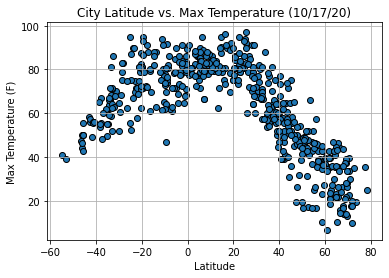

In [9]:
lat = clean_city_data[['Lat']]
temp = clean_city_data[['Max Temp']]

plt.scatter(lat, temp, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (10/17/20)')

# export plot to output directory
plt.savefig('output_data/Fig1.png')

plt.show()

# The scatter plot shows what the different maximum temperatures are for the cities in the list, also showing how far
# each city is from the equator. It looks like the cities closest to the equator have the highest maximum temperatures.

## Latitude vs. Humidity Plot

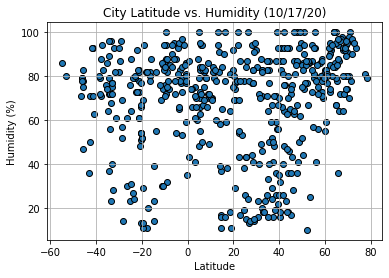

In [10]:
lat = clean_city_data[['Lat']]
hum = clean_city_data[['Humidity']]

plt.scatter(lat, hum, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (10/17/20)')

# export plot to output directory
plt.savefig('output_data/Fig2.png')

plt.show()

# This scatter plot shows the humidity of each city, compared to each city's distance from the equator. There seems to
# be a weaker relationship between the two variables, but cities to the north of the equator seem to have more humidity.

## Latitude vs. Cloudiness Plot

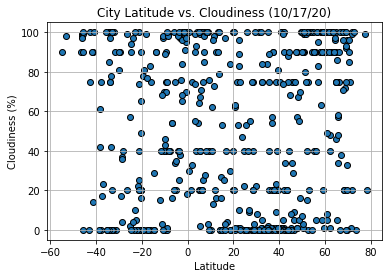

In [11]:
lat = clean_city_data[['Lat']]
cloud = clean_city_data[['Cloudiness']]

plt.scatter(lat, cloud, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (10/17/20)')

# export plot to output directory
plt.savefig('output_data/Fig3.png')

plt.show()

# This scatter plot shows a city's cloudiness percentage compared to its distance from the equator. There seems to
# be a weak relationship between the two, as cities all have differing cloudiness levels regardless of distance from
# the equator.

## Latitude vs. Wind Speed Plot

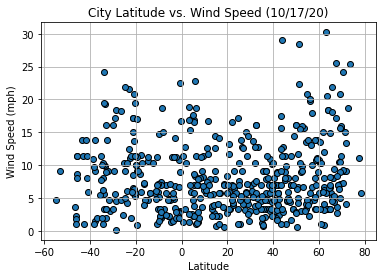

In [12]:
lat = clean_city_data[['Lat']]
wind = clean_city_data[['Wind Speed']]

plt.scatter(lat, wind, edgecolors='black')
plt.grid(axis='both')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (10/17/20)')

# export plot to output directory
plt.savefig('output_data/Fig4.png')

plt.show()

# From this scatter plot, we see that the very windiest cities are north of the equator, but there is not a
# strong relationship, as cities both close to and south of the equator seem to reach similar wind speeds.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8859920977284791


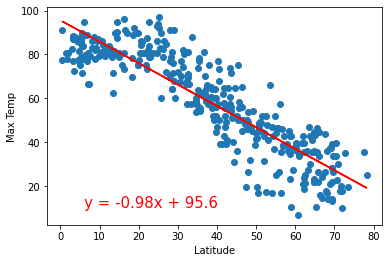

In [13]:
north_hem_df = clean_city_data.loc[clean_city_data['Lat'] > 0]

lat = north_hem_df['Lat']
temp = north_hem_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is:", rvalue)

plt.scatter(lat, temp)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6248192874989945


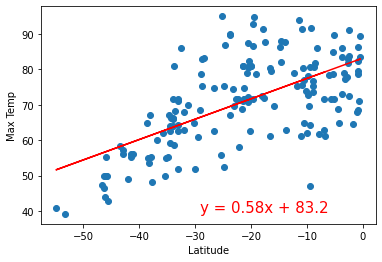

In [14]:
south_hem_df = clean_city_data.loc[clean_city_data['Lat'] < 0]

lat = south_hem_df['Lat']
temp = south_hem_df['Max Temp']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, temp)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is:", rvalue)

plt.scatter(lat, temp)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(200, 50), xycoords = 'figure points', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

# In the northern hemisphere, there is a strong negative correlation between latitude and maximum temperature, meaning
# the further north from the equator, the lower the temperatures. The same could be said for temperatures of cities to
# south of the equator. However, the graph shows a moderate positive correlation, as the distance decreases from the 
# equator, the maximum temperatures increase.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.24001671283046278


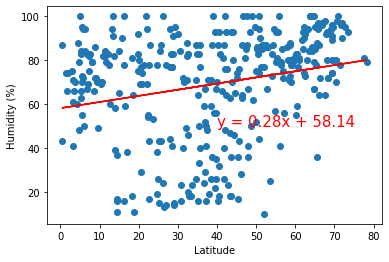

In [15]:
lat = north_hem_df['Lat']
hum = north_hem_df['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, hum)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is:", rvalue)

plt.scatter(lat, hum)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.07079198483033336


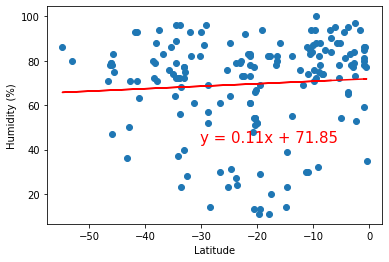

In [16]:
lat = south_hem_df['Lat']
hum = south_hem_df['Humidity']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, hum)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is:", rvalue)

plt.scatter(lat, hum)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(200, 120), xycoords = 'figure points', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

# There is a very weak relationship between latitude and humidity percentage levels of cities both 
# north and south of the equator. The line plots are both very flat as there are not many data points that can
# fit into the line plot equation. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.17357313583840464


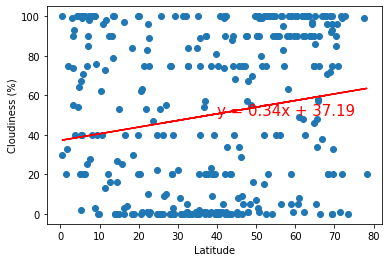

In [17]:
lat = north_hem_df['Lat']
cloud = north_hem_df['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is:", rvalue)

plt.scatter(lat, cloud)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(40,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.025483623369221626


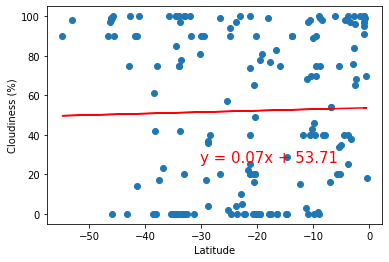

In [18]:
lat = south_hem_df['Lat']
cloud = south_hem_df['Cloudiness']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, cloud)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is:", rvalue)

plt.scatter(lat, cloud)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(200, 100), xycoords = 'figure points', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

# Like humidity, cloudiness percentage levels also have a very weak relationship with the latitude of the cities. 
# The r-values of the relationships show that there is close to no relationship between cloudiness and latitude of 
# a city.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17719351940020991


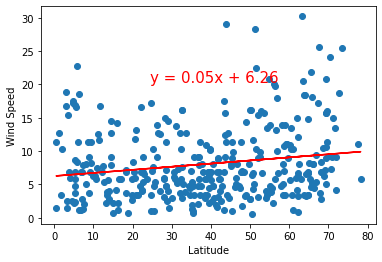

In [19]:
lat = north_hem_df['Lat']
wind = north_hem_df['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is:", rvalue)

plt.scatter(lat, wind)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(150,180), xycoords='figure points', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.11526812588804841


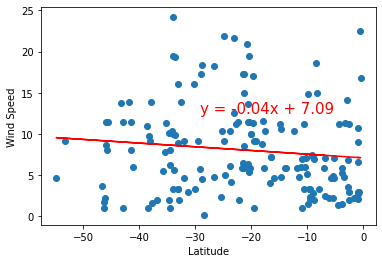

In [20]:
lat = south_hem_df['Lat']
wind = south_hem_df['Wind Speed']


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat, wind)
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print("The r-value is:", rvalue)

plt.scatter(lat, wind)
plt.plot(lat,regress_values,"r-")
plt.annotate(line_eq,(200, 150), xycoords = 'figure points', fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

# Wind speeds and latitude of cities bear almost no relationship, explained by the weak r-values of the relationships
# between the two variables. The scatter plots and line graphs show that the line plot equations can explain very few
# data points at best, which means the correlation between the two variables is close to nil. 